In [1]:
%%javascript
(function(on) {
const e=$( "<a>Setup failed</a>" );
const ns="js_jupyter_suppress_warnings";
var cssrules=$("#"+ns);
if(!cssrules.length) cssrules = $("<style id='"+ns+"' type='text/css'>div.output_stderr { } </style>").appendTo("head");
e.click(function() {
    var s='Showing';  
    cssrules.empty()
    if(on) {
        s='Hiding';
        cssrules.append("div.output_stderr, div[data-mime-type*='.stderr'] { display:none; }");
    }
    e.text(s+' warnings (click to toggle)');
    on=!on;
}).click();
$(element).append(e);
})(true);

<IPython.core.display.Javascript object>

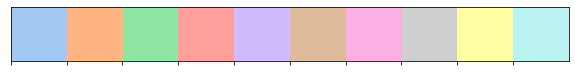

In [55]:
# importing dependencies
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import missingno as msno
# setting the pastel colour palette for seaborn
palette = sns.color_palette("pastel")
sns.palplot(palette)

In [56]:
# setting pandas properties to view all the columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [57]:
# reading the data set
data = pd.read_csv('loan.csv')
print("Shape of the data frame: ",data.shape)

Shape of the data frame:  (39717, 111)


D:\Softwares\Anaconda_Installation\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [58]:
data.shape

(39717, 111)

### Cleaning the data

##### Handling Missing Values

<AxesSubplot:>

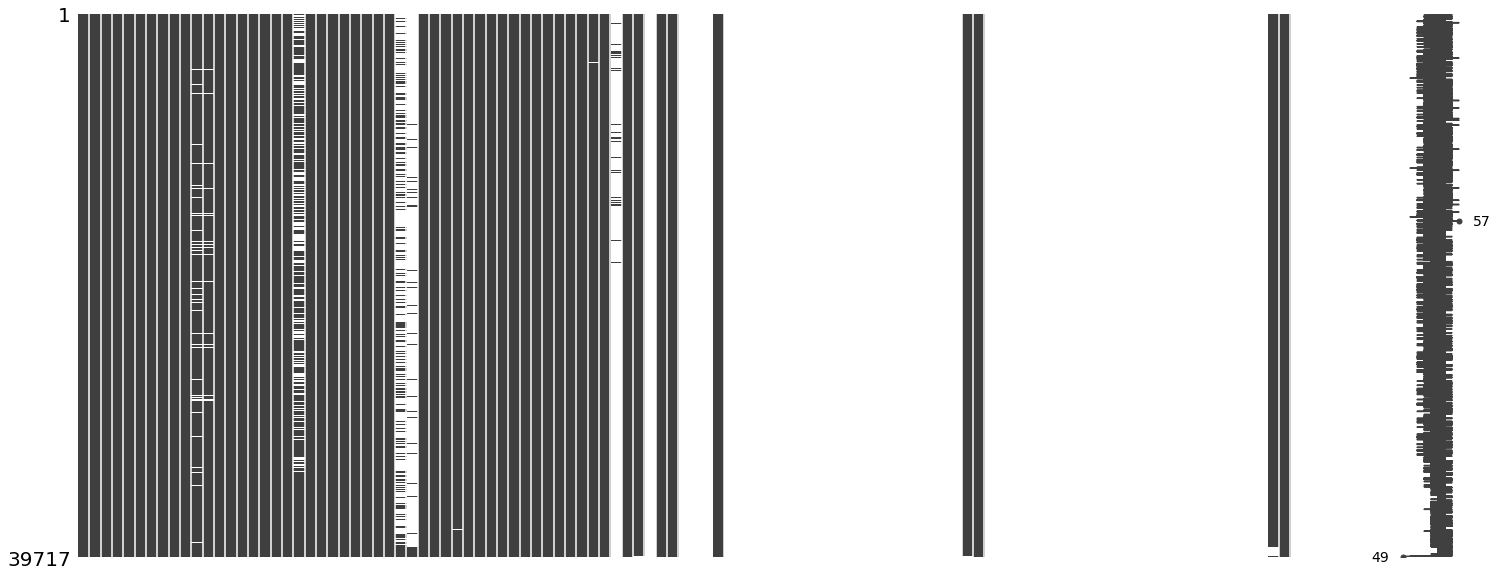

In [59]:
# checking for Null values
msno.matrix(data)

In [60]:
# as we observe alot of columns have all the values as None, hence these are of no use to us for analysis 
# we drop these columns
data = data.dropna(axis=1, how='all')
# also we plan on dropping the following columns for the below mentioned reasons
# url -> there is no information we can get from URLs, urls have the loan is's which we already have in the dataset
# tax_liens -> All the values here are 0's or either NA's, so this cannot be a factor for rejection or approval of loan
# pymnt_plan -> All the values are 'n' here, so this cannot be a factor for reject or approval of loan
# policy_code -> all values are '1' here
# initial_list_status -> all values are 'f' here
# collections_12_mths_ex_med -> all are individual borrowers
# application_type -> all values are 0's or NA's
data = data.drop(
    ['url','tax_liens','pymnt_plan','policy_code','initial_list_status','collections_12_mths_ex_med','application_type'],
    axis=1
    )
print("Shape Remains: ",data.shape)

Shape Remains:  (39717, 50)


In [61]:
data.shape

(39717, 50)

<AxesSubplot:>

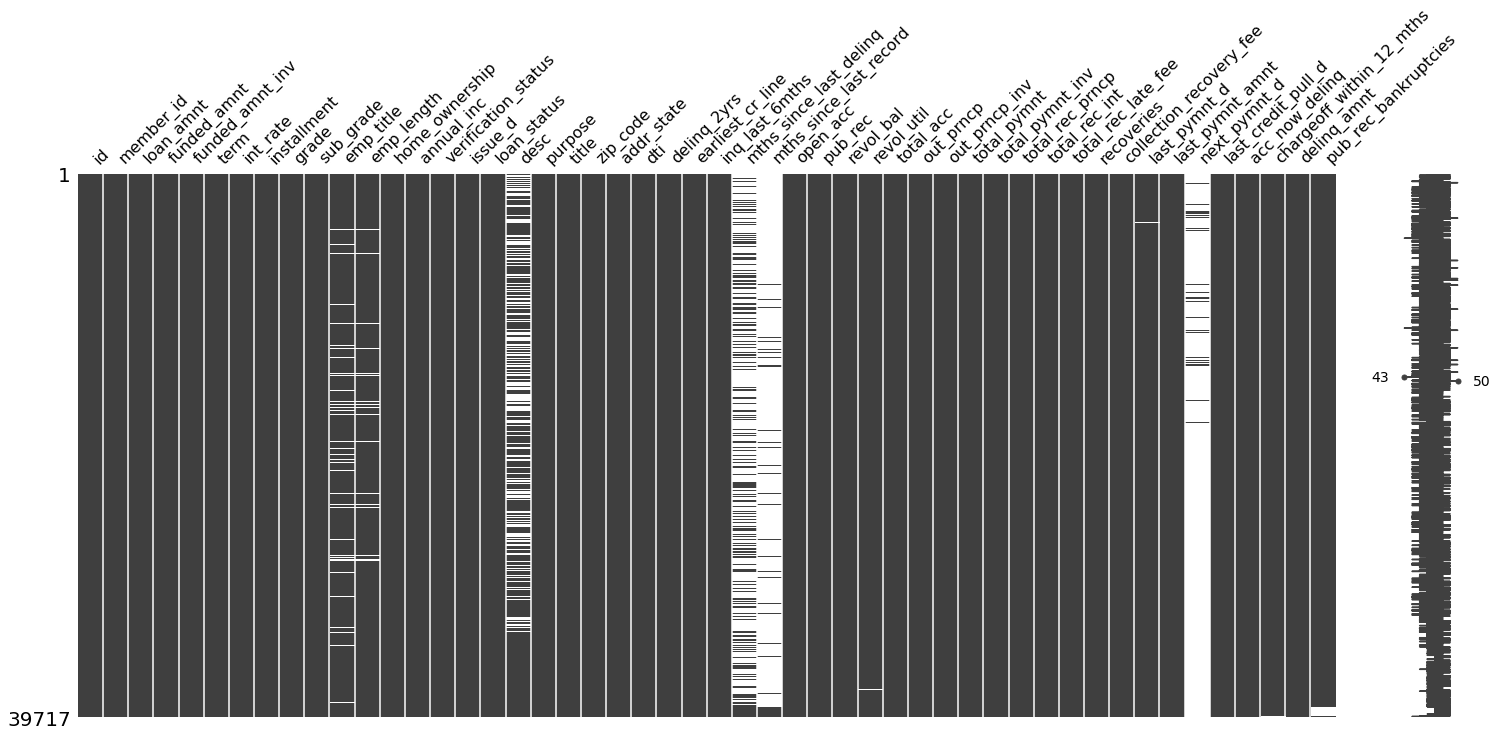

In [62]:
### Let us now check how many columns still have NA values left
msno.matrix(data)

In [63]:
# Now let us look at the columns which still contains null values
data = data.drop(
    ['title','desc','next_pymnt_d','mths_since_last_delinq','mths_since_last_record'],
    axis=1
    )

In [64]:
data.shape

(39717, 45)

<AxesSubplot:>

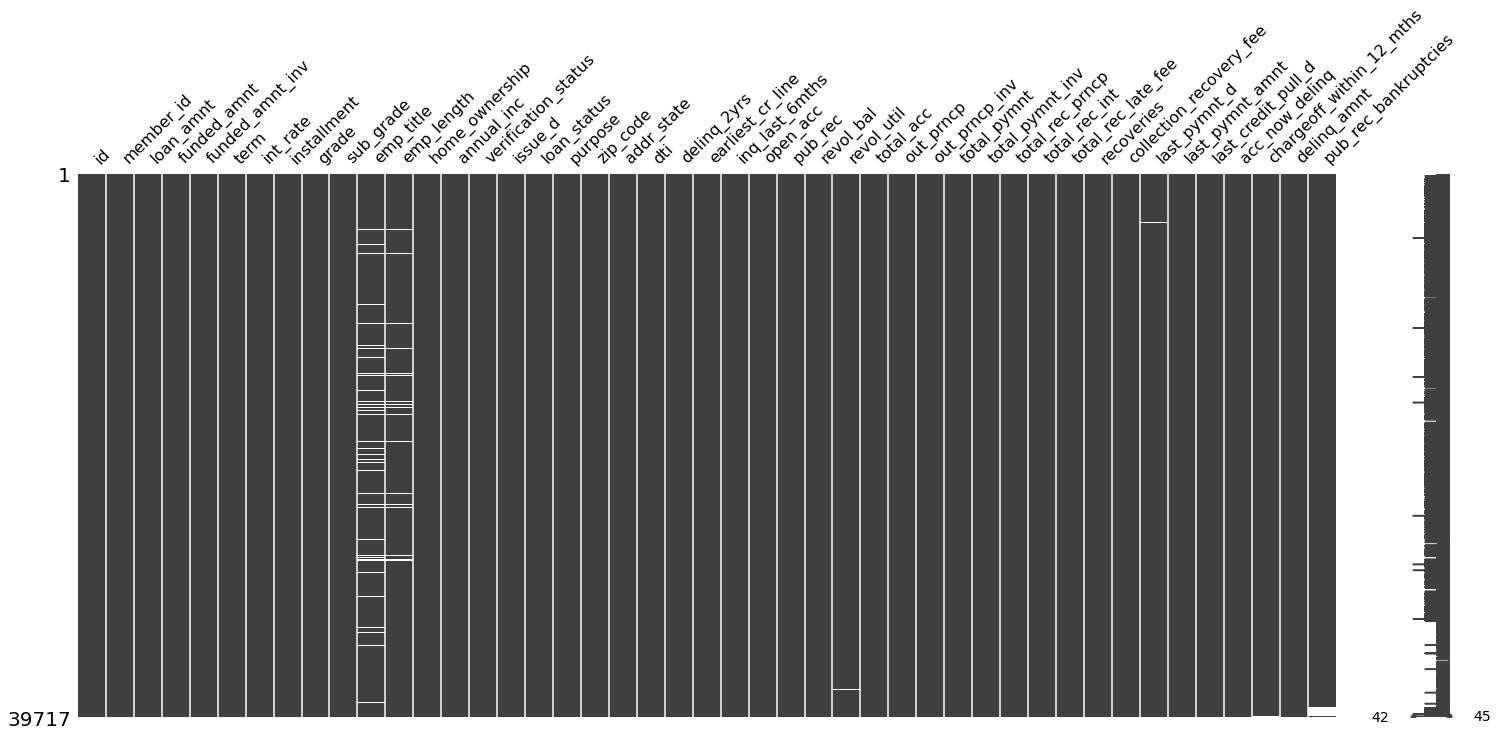

In [65]:
### Let us again check how many columns still have NA values left
msno.matrix(data)

In [66]:
### Let us handle the few null values we are left with
data.emp_title.fillna('Not Specified', inplace=True) # as we do not know the actual value and imputing values could cause problems
data.emp_length.fillna(data.emp_length.mode()[0], inplace=True) # the highest value count was 10+ years, so it would notmatter much how increase few more records of this type
data.revol_util.fillna(0, inplace=True)
data.pub_rec_bankruptcies.fillna(0.0, inplace=True)
data.last_pymnt_d.fillna('last amount not paid', inplace=True) # last amount was not paid due to which the loan was charged off

<AxesSubplot:>

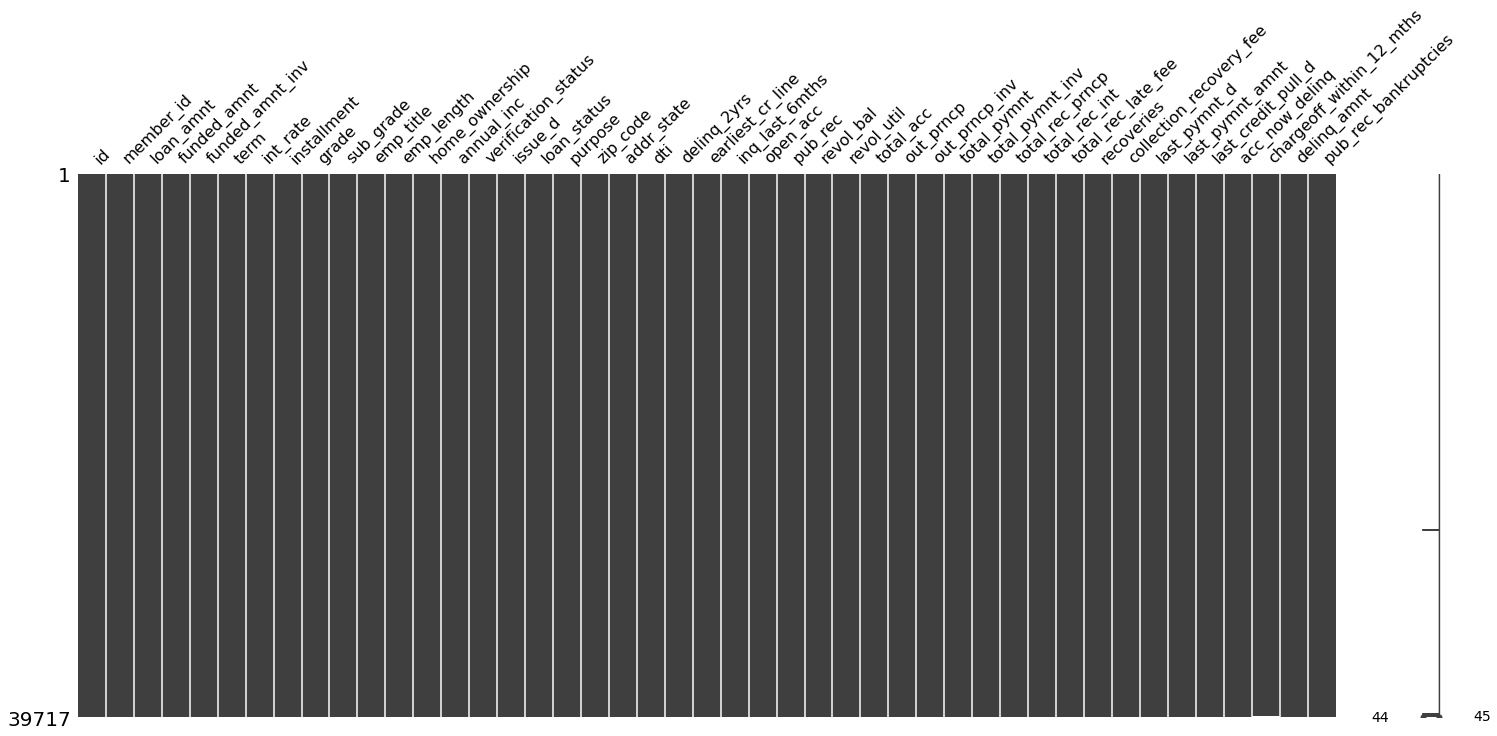

In [67]:
### now after filing in all the na values we again check for nulls
msno.matrix(data)

We have handled the missing values of data set in a way which <b>does not result into loss of data</b>, each and every column was analyzed before makeing fill up null values or dropping of the column.<br>
Moving on to sanity checks we will have to take care of some of the columns data types and the values it contains before we move on to Analysis of the dataset

##### Handling Column Data Types and Conducting Sanity Checks

In [68]:
### Now let us look at the sanity of the data
data.head(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,Not Specified,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0,0.0,0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0,0.0,0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,Not Specified,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0,0.0,0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0,0.0,0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0,0.0,0,0.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,852xx,AZ,11.20,0,Nov-04,3,9,0,7963,28.30%,12,0.00,0.00,5632.210000,5632.21,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,0,0.0,0,0.0
6,1069639,1304742,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,Southern Star Photography,8 years,RENT,47004.0,Not Verified,Dec-11,Fully Paid,debt_consolidation,280xx,NC,23.51,0,Jul-05,1,7,0,17726,85.60%,11,0.00,0.00,10110.840000,10110.84,6985.61,3125.23,0.00,0.00,0.00,May-16,1313.76,May-16,0,0.0,0,0.0
7,1072053,1288686,3000,3000,3000.0,36 months,18.64%,109.43,E,E1,MKC Accounting,9 years,RENT,48000.0,Source Verified,Dec-11,Fully Paid,car,900xx,CA,5.35,0,Jan-07,2,4,0,8221,87.50%,4,0.00,0.00,3939.135294,3939.14,3000.00,939.14,0.00,0.00,0.00,Jan-15,111.34,Dec-14,0,0.0,0,0.0
8,1071795,1306957,5600,5600,5600.0,60 months,21.28%,152.39,F,F2,Not Specified,4 years,OWN,40000.0,Source Verified,Dec-11,Charged Off,small_business,958xx,CA,5.55,0,Apr-04,2,11,0,5210,32.60%,13,0.00,0.00,646.020000,646.02,162.02,294.94,0.00,189.06,2.09,Apr-12,152.39,Aug-12,0,0.0,0,0.0
9,1071570,1306721,5375,5375,5350.0,60 months,12.69%,121.45,B,B5,Starbucks,< 1 year,RENT,15000.0,Verified,Dec-11,Charged Off,other,774xx,TX,18.08,0,Sep-04,0,2,0,9279,36.50%,3,0.00,0.00,1476.190000,1469.34,673.48,533.42,0.00,269.29,2.52,Nov-12,121.45,Mar-13,0,0.0,0,0.0


In [ ]:
# we need to make some hygiene changes to the data set